In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
data = pd.read_csv('data.csv')

In [41]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7143 entries, 0 to 7142
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7143 non-null   object 
 1   gender            7143 non-null   object 
 2   SeniorCitizen     7143 non-null   int64  
 3   Partner           7143 non-null   object 
 4   Dependents        7143 non-null   object 
 5   tenure            7143 non-null   int64  
 6   PhoneService      7143 non-null   object 
 7   MultipleLines     7143 non-null   object 
 8   InternetService   7143 non-null   object 
 9   OnlineSecurity    7126 non-null   object 
 10  OnlineBackup      7143 non-null   object 
 11  DeviceProtection  7143 non-null   object 
 12  TechSupport       7143 non-null   object 
 13  StreamingTV       7143 non-null   object 
 14  StreamingMovies   7143 non-null   object 
 15  Contract          7143 non-null   object 
 16  PaperlessBilling  7143 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Pair plot of some crucial features

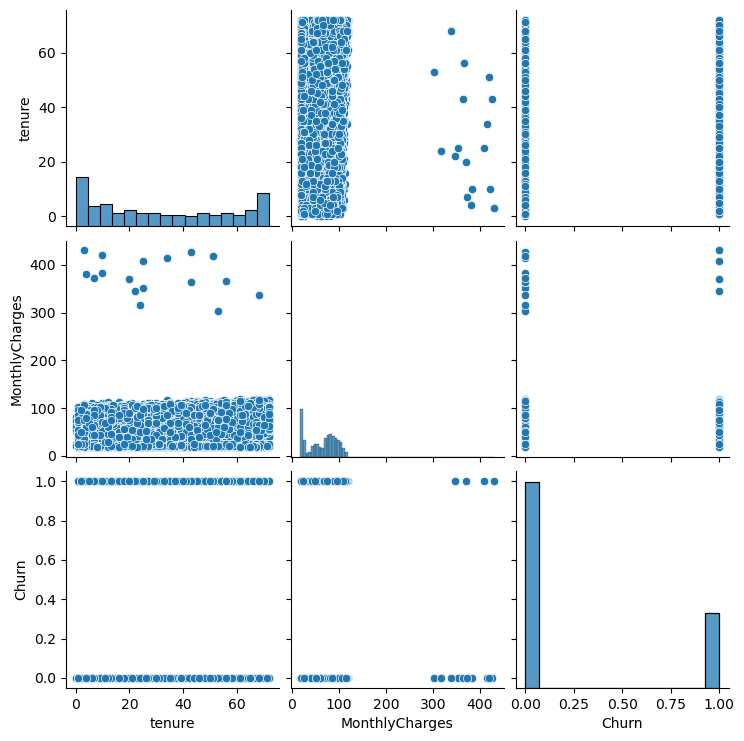

In [38]:
# Create a pair plot
columns = ['tenure','MonthlyCharges','TotalCharges','Churn']
sns.pairplot(data[columns])
plt.show()

##### The pair plot of seemingly important features of the data to idnetify initial trends among data for churn prediction.

## Churn value Pie chart

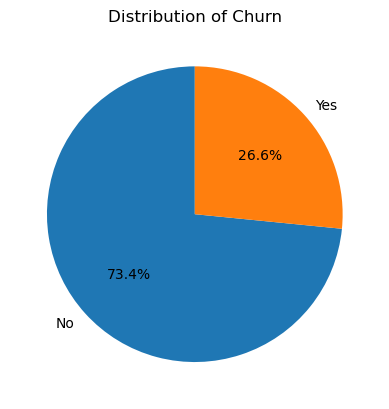

In [37]:
churn_cnt = data['Churn'].value_counts()

#Pie Chart
plt.pie(churn_cnt, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Churn distribution')
plt.show()

##### The churn data shows 26.6% of customers as churned while rest 73.4% of the customers stayed with the company. It can be induced from this pie chart that more than quarter of the customers has left. 

# Churn distribution based on gender

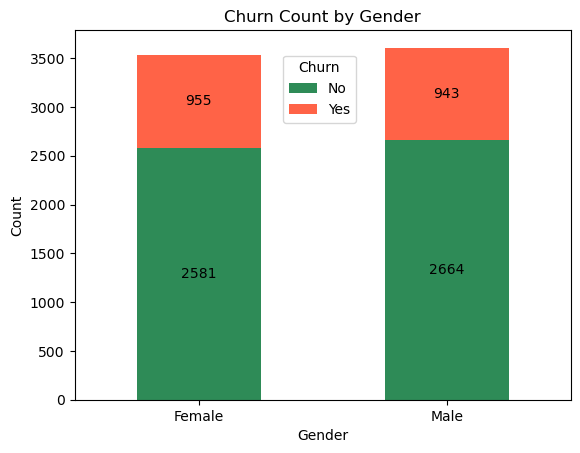

In [84]:
# Map gender and churn values to more descriptive labels
plot_data = {'Gender': data['gender'].map({0: 'Female', 1: 'Male'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)

ct = pd.crosstab(plot_df['Gender'], plot_df['Churn'])
ax = ct.plot(kind='bar', stacked=True, color=['seagreen', 'tomato'])
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(0.58, 0.95))

# Add counts inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

plt.show()

# Chrun distribution by Senior Citizens

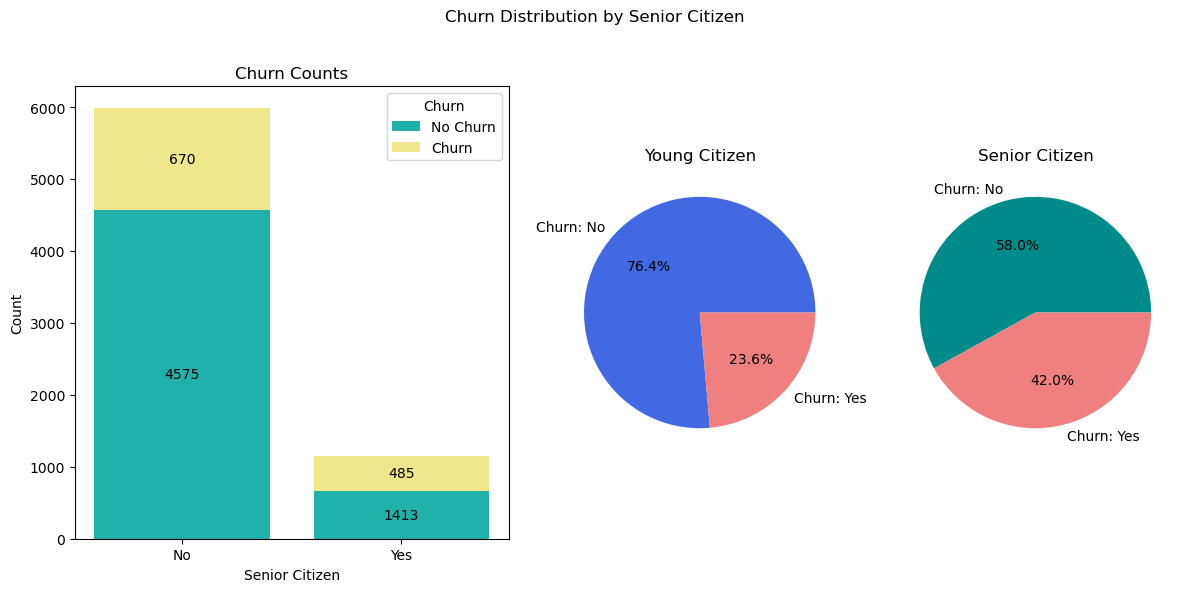

In [110]:
plot_data = {'Senior Citizen': data['SeniorCitizen'].map({0: 'No', 1: 'Yes'}),
             'Churn': data['Churn'].map({0: 'No', 1: 'Yes'})}
plot_df = pd.DataFrame(plot_data)

# Create crosstab for counts
ct = pd.crosstab(plot_df['Senior Citizen'], plot_df['Churn'])

# Create a custom layout using gridspec
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 2, 2])


# First subplot (whole left side)
ax0 = plt.subplot(gs[0])
ax0.bar(ct.index, ct['No'], color='lightseagreen', label='No Churn')
ax0.bar(ct.index, ct['Yes'], bottom=ct['No'], color='khaki', label='Churn')
ax0.set_title('Churn Counts')
ax0.set_xlabel('Senior Citizen')
ax0.set_ylabel('Count')
ax0.set_xticks(range(len(ct.index)))
ax0.set_xticklabels(ct.index, rotation=0)
ax0.legend(title='Churn')
# Add counts inside the bars
for p, count in zip(ax0.patches, ct.values.flatten()):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax0.text(x + width / 2, y + height / 2, f'{int(count)}', ha='center', va='center', fontsize=10, color='black')


#Second subplot (top right)
ax1 = plt.subplot(gs[1])
ax1.pie(ct.loc['No'], labels=['Churn: No', 'Churn: Yes'], autopct='%1.1f%%', colors=['royalblue', 'lightcoral'])
ax1.set_title('Young Citizen')

#Third subplot (bottom right)
ax2 = plt.subplot(gs[2])
ax2.pie(ct.loc['Yes'], labels=['Churn: No', 'Churn: Yes'], autopct='%1.1f%%', colors=['darkcyan', 'lightcoral'])
ax2.set_title('Senior Citizen')

plt.suptitle('Churn Distribution by Senior Citizen')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to prevent clipping of the suptitle
plt.show()


#### We can clearly see from the bar plot that young people (No for senior citizen) leaves more compared to the senior citizens countwise. But when compared in each category it is clear from the pie charts that almost 42% of senior citizens left which is nearly double the percentage of Young citizens (Senior Citizens = No) left.